# Setup

In [2]:
import crispr as cr 
import pertpy
import os

# File Paths
print(dir(cr.ax))
DIR_PRJ = "/home/asline01/projects/crispr-screening"
DIR_CRC = "analysis/cellranger/cr_count_2023-05-09_0828"
SUBJ = "HH03"
file = os.path.join(DIR_PRJ, DIR_CRC, f"{SUBJ}/outs/filtered_feature_bc_matrix")
# file = "data/adamson_2016_upr_perturb_seq.h5ad"
# file = "CRISPRi"
# file = "screen"
# file = "2KO"
# file = "bulk"
files_public_data = {
    "CRISPRi": "data/adamson_2016_upr_perturb_seq.h5ad",
    "pool": "data/data_pertpy_normal_2019_raw.h5ad",
    "bulk": "data/burczynski_crohn.h5ad",
    "screen": "data/dixit_2016_raw.h5ad"
    }
write_public = True  # if need to download public data, write to examples/data?
print(file)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'calculate_perturbations', 'calculate_targeting_efficiency', 'cluster', 'clustering', 'perform_augur', 'perform_differential_prioritization']
/home/asline01/projects/crispr-screening/analysis/cellranger/cr_count_2023-05-09_0828/HH03/outs/filtered_feature_bc_matrix


## Data & Preprocessing

In [15]:
if file in files_public_data:
    adata = None
    if os.path.exists(files_public_data[file]):
        try:
            adata = cr.pp.create_object_scanpy(
                files_public_data[file])  # create scanpy object
        except Exception:
            pass
    if adata is None:
        if file == "CRISPRi":  # CRISPRi Perturb-seq Pertpy data
            # adata = pertpy.data.replogle_2022_k562_essential()  # download takes ~1 hour
            # adata = pertpy.data.replogle_2022_k562_gwps()
            # adata = pertpy.data.replogle_2022_rpe1()
            adata = pertpy.data.adamson_2016_upr_perturb_seq()  # 8 minutes to download
        elif file == "screen":  # Perturb-seq CRISPR screen Pertpy data
            adata = pertpy.data.dixit_2016_raw()
        elif file == "bulk":  # bulk RNA-seq data
            adata = pertpy.data.burczynski_crohn()
        elif file == "pool":
            adata = pertpy.data.norman_2019_raw()  # download ~ 10 minutes
        if write_public is True:
            adata.write(files_public_data[file])
elif os.path.exists(file):
    adata = cr.pp.create_object_scanpy(file)  # create scanpy object
else:
    raise ValueError(f"{file} not a valid option for 'file' argument.")
print(adata)
adata.obs

AnnData object with n_obs × n_vars = 14743 × 3576
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCCAAGAATTTGG-1,344,344,398.563629,6.971447,1.749143,2
AAACCCAAGATTTGCC-1,1055,1055,808.697388,7.604581,0.940349,4
AAACCCAAGCGATTCT-1,1442,1442,842.110657,7.778999,0.923750,5
AAACCCAAGTCGGGAT-1,477,477,641.633789,9.157947,1.427286,0
AAACCCAAGTCTGCAT-1,738,738,602.787048,2.323875,0.385522,2
...,...,...,...,...,...,...
TTTGTTGGTTGCCGAC-1,896,896,906.545349,4.618813,0.509496,4
TTTGTTGTCACTGTTT-1,536,536,463.026367,8.210871,1.773305,2
TTTGTTGTCAGACCCG-1,373,373,826.997375,0.000000,0.000000,7
TTTGTTGTCAGTGTGT-1,893,893,743.192993,7.000270,0.941918,4


# Analysis

## UMAP




<<< PERFORMING PCA >>>

{kws_pca}



<<< COMPUTING NEIGHBORHOOD GRAPH >>>



<<< EMBEDDING WITH UMAP >>>

{}



<<< CLUSTERING >>>

{}


<<< CREATING UMAP PLOTS >>>


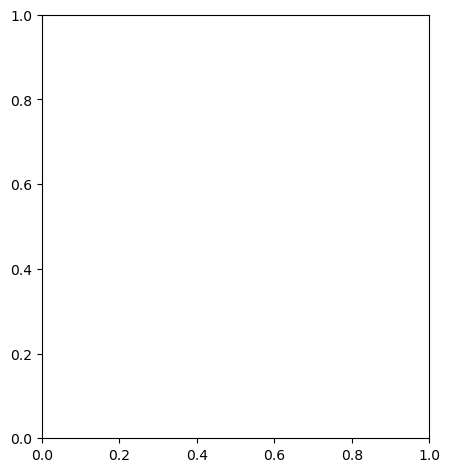

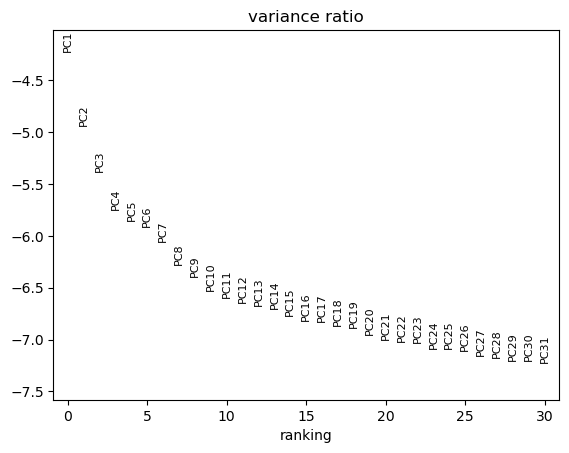

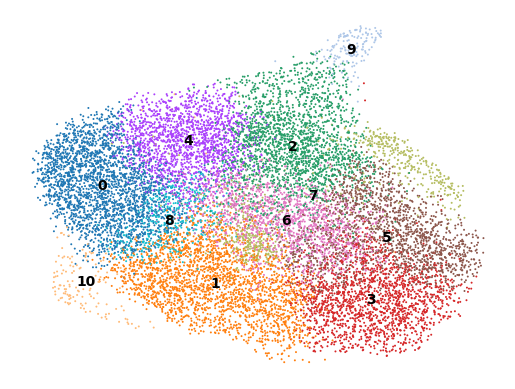

AnnData object with n_obs × n_vars = 14743 × 3576
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [10]:
figs_cluster = cr.ax.clustering.cluster(adata, plot=True, method_cluster="leiden")
adata

In [20]:
import pertpy as pt
classifier = "random_forest_classifier"
ag_rfc = pt.tl.Augur(classifier)
loaded_data = ag_rfc.load(adata)  # add dummy variables, rename cell type & label columns

KeyError: 'label'

In [17]:
# data, results, figs = cr.ax.perform_augur(adata, classifier="random_forest_classifier", augur_mode="default", subsample_size=20, n_threads=4, 
#                                           label_col="perturbation", label_cell_type="celltype", label_condition="OST4_pDS353", label_treatment="SEC61A1_pDS031")
data, results, figs = cr.ax.perform_augur(adata, classifier="random_forest_classifier", n_threads=4)

KeyError: 'label'

# Analysis

## Guide RNA Assignment

In [ ]:
figs_guide_rna = ca.assign_guide_rna(adata)
adata

sc.pl.violin(eval_adata, keys="ISG15", groupby="condition")